(fa-model-3-notebook)=
# Il modello multifattoriale 

In [1]:
source("_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semPlot")
    library("knitr")
    library("kableExtra")
    library("tidyr")
    library("corrplot")
    library("tidySEM")
})
options(repr.plot.width=6, repr.plot.height=6)
set.seed(42)


## Modello multifattoriale: fattori ortogonali

La teoria dei due fattori ha orientato per diversi anni le ricerche
sull'intelligenza, finché Thurstone (1945) non propose una sua modifica,
conosciuta come teoria multifattoriale. Secondo Thurstone la
covariazione tra le variabili manifeste non può essere spiegata da un
unico fattore generale. Invece è necessario ipotizzare l'azione causale
di diversi fattori, definiti comuni, i quali si riferiscono solo ad
alcune delle variabili considerate.

Il modello plurifattoriale assume che ciascuna variabile manifesta sia
espressa come funzione lineare di un certo numero $m$ di fattori comuni,
$\xi_1, \xi_2, \dots, \xi_m$, responsabili della correlazione con le
altre variabili, e di un solo fattore specifico (termine d'errore),
responsabile della variabilità della variabile stessa. Per $p$ variabili
manifeste, $Y_1, Y_2, \dots, Y_p$, il modello fattoriale diventa quello
indicato dal sistema di equazioni lineari descritto di seguito.
Idealmente, $m$ dovrebbe essere molto più piccolo di $p$ così da
consentire una descrizione parsimoniosa delle variabili manifeste in
funzione di pochi fattori soggiacenti.

Le variabili manifeste $Y$ sono indicizzate da $i = 1, \dots, p.$ Le
variabili latenti $\xi$ (fattori) sono indicizzate da $j = 1, \dots, m.$
I fattori specifici $\delta$ sono indicizzati da $i = 1, \dots, p.$ Le
saturazioni fattoriali si distinguono dunque tramite due indici, $i$ e
$j$: il primo indice si riferisce alle variabili manifeste, il secondo
si riferisce ai fattori latenti.

Indichiamo con $\mu_i$, con $i=1, \dots, p$ le medie delle $p$ variabili
manifeste $Y_1, Y_2, \dots, Y_p$. Se non vi è alcun effetto delle
variabili comuni latenti, allora la variabile $Y_{ijk}$, dove $k$ è
l'indice usato per i soggetti, sarà uguale a:

$$
\begin{equation}
\begin{cases} 
  Y_{1k}    &= \mu_1 + \delta_{1k} \\
&\vdots\\
Y_{ik}   &= \mu_i + \delta_{ik}\\
&\vdots\\
Y_{pk}   &= \mu_p + \delta_{pk} \notag
\end{cases}
\end{equation}
$$

Se invece le variabili manifeste rappresentano la somma
dell'effetto causale di $m$ fattori comuni e di $p$ fattori specifici,
allora possiamo scrivere: 

$$
\begin{equation}
\begin{cases} 
  Y_1  - \mu_1  &= \lambda_{11}\xi_1 + \dots + \lambda_{1k}\xi_k \dots +\lambda_{1m}\xi_m + \delta_1 \\
&\vdots\\
Y_i -  \mu_i  &= \lambda_{i1}\xi_1 + \dots +  \lambda_{ik}\xi_k \dots +\lambda_{im}\xi_m + \delta_i\\
&\vdots\\
Y_p - \mu_p  &= \lambda_{p1}\xi_1 + \dots +  \lambda_{pk}\xi_k \dots +\lambda_{pm}\xi_m + \delta_p \notag
\end{cases}
\end{equation}
$$

Nel precedente sistema di equazioni lineari,

-   $\xi_j$, con $j=1, \dots, m$, rappresenta la $j$-esima variabile
    inosservabile a fattore comune (ossia il $j$-esimo fattore comune a
    tutte le variabili $Y_i$);
-   $\lambda_{ij}$ rappresenta il parametro, detto *saturazione* o
    *peso* fattoriale, che riflette l'importanza del $j$-esimo fattore
    comune nella composizione della $i$-esima variabile osservabile;
-   $\delta_i$ rappresenta il fattore specifico (o unico) di ogni
    variabile manifesta $Y_i$.

In conclusione, secondo il modello multifattoriale, le variabili
manifeste $Y_i$, con $i=1, \dots, p$, sono il risultato di una
*combinazione lineare* di $m < p$ fattori inosservabili ad esse comuni
$\xi_j$, con $j=1, \dots, m$, e di $p$ fattori specifici $\delta_i$, con
$i=1, \dots, p$, anch'essi inosservabili e di natura residua.

### Assunzioni del modello multifattoriale

Le variabili inosservabili a fattore comune $\xi_j$, con
$j=1, \dots, m$, in quanto latenti, non possiedono unità di misura.
Pertanto, per semplicità si assume che abbiano media zero,
$\mathbb{E}(\xi_j)=0$, abbiano varianza unitaria,
$\mathbb{V} (\xi_j)= \mathbb{E}(\xi_j^2) - [\mathbb{E}(\xi_j)]^2=1$, e siano incorrelate
tra loro, $Cov(\xi_j, \xi_h)=0$, con $j, h = 1, \dots, m; \;j \neq h$.
Si assume inoltre che le variabili a fattore specifico $\delta_i$ siano
tra loro incorrelate, $Cov(\delta_i,\delta_k)=0$, con
$i, k = 1, \dots, p, \; i \neq k$, abbiano media zero,
$\mathbb{E}(\delta_i)=0$, e varianza uguale a $\mathbb{V} (\delta_i) = \psi_{ii}$.
La varianza $\psi_{ii}$ è detta *varianza specifica* o *unicità* della
$i$-esima variabile manifesta $Y_i$. Si assume infine che i fattori
specifici siano linearmente incorrelati con i fattori comuni, ovvero
$Cov(\xi_j, \delta_i)=0$ per ogni $j=1, \dots, m$ e per ogni
$i=1\dots,p$.

### Interpretazione dei parametri del modello

#### Covarianza tra variabili e fattori

Nell'ipotesi che le variabili $Y_i$ abbiano media nulla, la covarianza
tra $Y_i$ e $\xi_j$ è uguale alla saturazione fattoriale $\lambda_{ij}$:

$$
\begin{equation}
\begin{aligned}
  Cov(Y_i, \xi_j) &= \mathbb{E}(Y_i \xi_j)\notag\\
  &=\mathbb{E}\left[(\lambda_{i1} \xi_1 + \dots + \lambda_{im} \xi_m + \delta_i)\xi_j \right]\notag\\
  &= \lambda_{i1}\underbrace{\mathbb{E}(\xi_1\xi_j)}_{=0} + \dots + 
\lambda_{ij}\underbrace{\mathbb{E}(\xi_j^2)}_{=1} + \dots \notag\\
& \; + \lambda_{im}\underbrace{\mathbb{E}(\xi_m\xi_j)}_{=0} +
  \underbrace{\mathbb{E}(\delta_i \xi_j)}_{=0}\notag\\
  &= \lambda_{ij}.\notag
\end{aligned}
\end{equation}
$$

Anche nel modello multifattoriale, dunque, le saturazioni fattoriali rappresentano le covarianze tra le variabili e i fattori:

$$
Cov(Y_i, \xi_j) = \lambda_{ij} \qquad i=1, \dots, p; \quad j= 1, \dots, m. 
$$

Naturalmente, se le variabili sono standardizzate, le saturazioni fattoriali diventano correlazioni: 

$$
r_{ij} = \lambda_{ij}. 
$$

#### Espressione fattoriale della varianza

Come nel modello monofattoriale, la varianza delle variabili manifeste
si decompone in una componente dovuta ai fattori comuni, chiamata
*comunalità*, e in una componente specifica alle $Y_i$, chiamata
*unicità*. Nell'ipotesi che le variabili $Y_i$ abbiano media nulla, la
varianza di $Y_i$ è uguale a 

$$
\begin{equation}
\begin{aligned}
  \mathbb{V} (Y_i) 
  &=\mathbb{E}\left[ (\lambda_{i1} \xi_1 + \dots +
    \lambda_{im} \xi_m + \delta_i)^2 \right].
\end{aligned}
\end{equation}
$$(eq-eq-var-multifatt)

Come si sviluppa il polinomio precedente? Il quadrato di un polinomio è uguale alla somma
dei quadrati di tutti i termini più il doppio prodotto di ogni termine
per ciascuno di quelli che lo seguono. Il valore atteso del quadrato del
primo termine è uguale a $\lambda_{i1}^2\mathbb{E}(\xi_1^2)$ ma, essendo la
varianza di $\xi_1$ uguale a $1$, otteniamo semplicemente
$\lambda_{i1}^2$. Lo stesso vale per i quadrati di tutti i termini
seguenti tranne l'ultimo. Infatti, $\mathbb{E}(\delta_i^2)=\psi_{ii}$. Per quel
che riguarda i doppi prodotti, sono tutti nulli. In primo luogo perché,
nel caso di fattori ortogonali, la covarianza tra i fattori comuni è
nulla, $\mathbb{E}(\xi_j \xi_h)=0$, con $j \neq h$. In secondo luogo perché il
fattori comuni cono incorrelati con i fattori specifici, quindi
$\mathbb{E}(\delta_i \xi_j)=0$.

In conclusione, 

$$
\begin{equation}
\begin{aligned}
  \mathbb{V}(Y_i) &= \lambda_{i1}^2 + \lambda_{i2}^2 + \dots + \lambda_{im}^2 + \psi_{ii} \notag\\
  &= \sum_{j=1}^m \lambda_{ij}^2 + \psi_{ii}\notag\\
  &= h_i^2 + \psi_{ii}\notag\\
  &=\text{communalità} + \text{unicità},\notag
\end{aligned}
\end{equation}
$$
  
la varianza della variabile manifesta $Y_i$ è suddivisa in due parti: il
primo addendo è definito comunalità poiché rappresenta la parte di
variabilità della $Y_i$ spiegata dai fattori comuni; il secondo addendo
è invece definito varianza specifica (o unicità) poiché esprime la parte
di variabilità della $Y_i$ non spiegata dai fattori comuni.

#### Espressione fattoriale della covarianza

Quale esempio, consideriamo il caso di $p=5$ variabili osservabili e
$m=2$ fattori ortogonali. Se le variabili manifeste sono 'centrate'
(ovvero, se a ciascuna di esse sottraiamo la rispettiva media), allora
il modello multifattoriale diventa 

$$
\begin{equation}
\begin{aligned}
  Y_1 &= \lambda_{11} \xi_1 + \lambda_{12} \xi_2 + \delta_1,\notag\\
  Y_2 &= \lambda_{21} \xi_1 + \lambda_{22} \xi_2 + \delta_2,\notag\\
  Y_3 &= \lambda_{31} \xi_1 + \lambda_{32} \xi_2 + \delta_3,\notag\\
  Y_4 &= \lambda_{41} \xi_1 + \lambda_{42} \xi_2 + \delta_4,\notag\\
  Y_5 &= \lambda_{51} \xi_1 + \lambda_{52} \xi_2 + \delta_5.\notag
\end{aligned}
\end{equation}
$$

Nell'ipotesi che le variabili $Y_i$ abbiano media nulla, la
covarianza tra $Y_1$ e $Y_2$, ad esempio, è uguale a: 

$$
\begin{equation}
\begin{aligned}
  Cov(Y_1, Y_2) &= \mathbb{E}\left( Y_1 Y_2\right) \notag\\
  &= \mathbb{E}\left[ 
  (\lambda_{11} \xi_1 + \lambda_{12} \xi_2 + \delta_1)
   (\lambda_{21} \xi_1 + \lambda_{22} \xi_2 +  \delta_2)
  \right]\notag\\
  &= \lambda_{11} \lambda_{21} \mathbb{E}(\xi_1^2) +
      \lambda_{11} \lambda_{22} \mathbb{E}(\xi_1 \xi_2) +\notag 
      \lambda_{11} \mathbb{E}(\xi_1 \delta_2) +\notag\\
    &\quad \lambda_{12} \lambda_{21}\mathbb{E}(\xi_1 \xi_2)\, + 
      \lambda_{12} \lambda_{22}\mathbb{E}(\xi^2_2)\, + 
      \lambda_{12} \mathbb{E}(\xi_2\delta_2) +\notag\\
    &\quad \lambda_{21} \mathbb{E}(\xi_1\delta_1) +\notag 
     \lambda_{22} \mathbb{E}(\xi_2\delta_1) + \mathbb{E}(\delta_1 \delta_2)\notag\\
   &= \lambda_{11} \lambda_{21} + \lambda_{12} \lambda_{22}.\notag
\end{aligned}
\end{equation}

$$
In conclusione, la covarianza tra le variabili manifeste $Y_l$ e $Y_m$
riprodotta dal modello è data dalla somma dei prodotti delle saturazioni
$\lambda_l \lambda_m$ nei due fattori.

**Esempio.** Consideriamo i dati riportati da {cite:t}`brown2015confirmatory`, ovvero otto misure di personalità raccolte su un campione di 250 pazienti che hanno concluso un programma di psicoterapia. Le scale sono le seguenti:

- anxiety (N1), 
- hostility (N2), 
- depression (N3), 
- self-consciousness (N4), 
- warmth (E1), 
- gregariousness (E2), 
- assertiveness (E3), 
- positive emotions (E4). 


In [2]:
varnames <- c("N1", "N2", "N3", "N4", "E1", "E2", "E3", "E4")
sds <- '5.7  5.6  6.4  5.7  6.0  6.2  5.7  5.6'

cors <- '
 1.000
 0.767  1.000 
 0.731  0.709  1.000 
 0.778  0.738  0.762  1.000 
-0.351  -0.302  -0.356  -0.318  1.000 
-0.316  -0.280  -0.300  -0.267  0.675  1.000 
-0.296  -0.289  -0.297  -0.296  0.634  0.651  1.000 
-0.282  -0.254  -0.292  -0.245  0.534  0.593  0.566  1.000'

psychot_cor_mat <- getCov(cors, names = varnames)
n <- 250

Eseguiamo l'analisi fattoriale esplorativa con il metodo della massima verosimiglianza ipotizzando due fattori comuni incorrelati:

In [3]:
n_facs <- 2
fit_efa <- factanal(
  covmat = psychot_cor_mat,
  factors = n_facs,
  rotation = "varimax",
  n.obs = n
)

Esaminiamo le saturazioni fattoriali:

In [4]:
lambda <- fit_efa$loadings
print(lambda)


Loadings:
   Factor1 Factor2
N1  0.854  -0.228 
N2  0.826  -0.194 
N3  0.811  -0.233 
N4  0.865  -0.186 
E1 -0.202   0.773 
E2 -0.139   0.829 
E3 -0.158   0.771 
E4 -0.147   0.684 

               Factor1 Factor2
SS loadings      2.923   2.526
Proportion Var   0.365   0.316
Cumulative Var   0.365   0.681


La soluzione fattoriale conferma la presenza di due fattori: il primo fattore satura sulle scale di neutoricismo, il secono sulle scale di estroversione.

La correlazione riprodotta $r_{12}$ è uguale a $\lambda_{11}\lambda_{21} + \lambda_{12}\lambda_{22}$ 

In [5]:
lambda[1, 1] * lambda[2, 1] + lambda[1, 2] * lambda[2, 2]

[1] 0.7492844

e corrisponde da vicino alla correlazione osservata 0.767.

L'intera matrice di correlazioni riprodotte è
$\boldsymbol{\Lambda} \boldsymbol{\Lambda}^{\mathsf{T}} + \boldsymbol{\psi}$:

In [6]:
Rr <- lambda %*% t(lambda) + diag(fit_efa$uniq)
Rr %>% 
  round(3)

,N1,N2,N3,N4,E1,E2,E3,E4
N1,1.000,0.749,0.745,0.781,-0.348,-0.307,-0.311,-0.281
N2,0.749,1.000,0.715,0.751,-0.317,-0.276,-0.281,-0.254
N3,0.745,0.715,1.000,0.745,-0.344,-0.306,-0.308,-0.279
N4,0.781,0.751,0.745,1.000,-0.318,-0.274,-0.280,-0.254
E1,-0.348,-0.317,-0.344,-0.318,1.000,0.669,0.628,0.558
E2,-0.307,-0.276,-0.306,-0.274,0.669,1.000,0.661,0.587
E3,-0.311,-0.281,-0.308,-0.280,0.628,0.661,1.000,0.550
E4,-0.281,-0.254,-0.279,-0.254,0.558,0.587,0.550,1.000


La differenza tra la matrice di correlazioni riprodotte e la matrice di
correlazioni osservate è uguale a:

In [7]:
(psychot_cor_mat - Rr) %>% 
  round(3)

,N1,N2,N3,N4,E1,E2,E3,E4
N1,0.000,0.018,-0.014,-0.003,-0.003,-0.009,0.015,-0.001
N2,0.018,0.000,-0.006,-0.013,0.015,-0.004,-0.008,0.000
N3,-0.014,-0.006,0.000,0.017,-0.012,0.006,0.011,-0.013
N4,-0.003,-0.013,0.017,0.000,0.000,0.007,-0.016,0.009
E1,-0.003,0.015,-0.012,0.000,0.000,0.006,0.006,-0.024
E2,-0.009,-0.004,0.006,0.007,0.006,0.000,-0.010,0.006
E3,0.015,-0.008,0.011,-0.016,0.006,-0.010,0.000,0.016
E4,-0.001,0.000,-0.013,0.009,-0.024,0.006,0.016,0.000


**Esempio.** Consideriamo nuovamente i dati precedenti ma, in questo caso, eseguiamo un'analisi fattoriale confermativa. Usando `lavaan` il modello diventa:

In [8]:
cfa_mod <- "
  N =~ N1 + N2 + N3 + N4
  E =~ E1 + E2 + E3 + E4
"

In [9]:
fit_cfa <- lavaan::cfa(
  cfa_mod,
  sample.cov = psychot_cor_mat,
  sample.nobs = n,
  orthogonal = TRUE,
  std.lv = TRUE
)

Il path diagram si ottiene nel modo seguente:

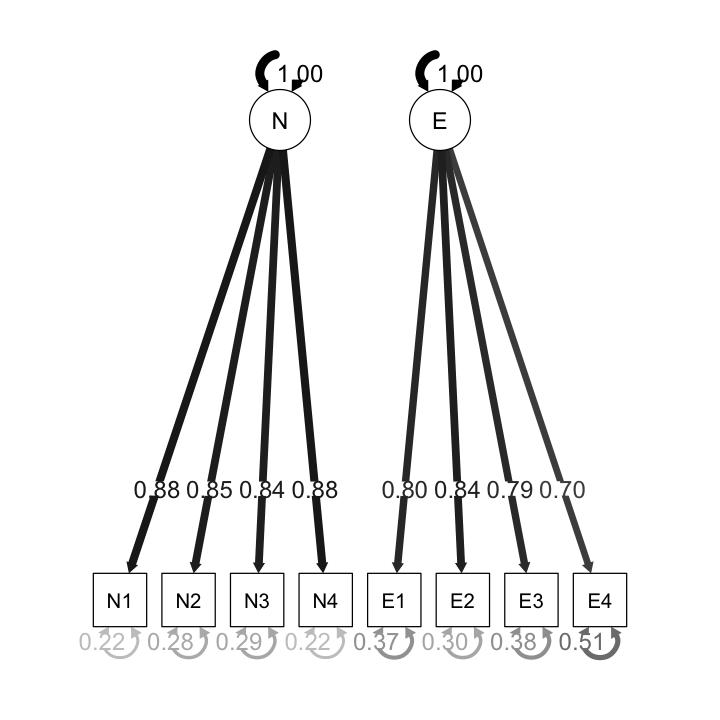

In [10]:
semPaths(
  fit_cfa,
  "std", 
  posCol = c("black"),
  edge.label.cex = 1.2, 
  sizeMan = 7,
  edge.label.position = 0.8 # Adjust this value to control label position
  )

Esaminiamo le saturazioni fattoriali:

In [11]:
parameterEstimates(fit_cfa, standardized = TRUE) %>%
  dplyr::filter(op == "=~") %>%
  dplyr::select(
    "Latent Factor" = lhs, 
    Indicator = rhs, 
    B = est, 
    SE = se, 
    Z = z, 
    "p-value" = pvalue, 
    Beta = std.all) %>%
  knitr::kable(digits = 3, booktabs = TRUE, format = "markdown", 
               caption = "Factor Loadings")



Table: Factor Loadings

|Latent Factor |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-------------|:---------|-----:|-----:|------:|-------:|-----:|
|N             |N1        | 0.882| 0.051| 17.422|       0| 0.884|
|N             |N2        | 0.847| 0.052| 16.340|       0| 0.849|
|N             |N3        | 0.840| 0.052| 16.134|       0| 0.842|
|N             |N4        | 0.882| 0.051| 17.432|       0| 0.884|
|E             |E1        | 0.795| 0.056| 14.276|       0| 0.796|
|E             |E2        | 0.838| 0.054| 15.369|       0| 0.839|
|E             |E3        | 0.788| 0.056| 14.097|       0| 0.789|
|E             |E4        | 0.697| 0.058| 11.942|       0| 0.699|

Il risultato sembra sensato: le saturazioni su ciascun fattore sono molto alte. Tuttavia, la matrice delle correlazioni residue

In [12]:
cor_table <- residuals(fit_cfa, type = "cor")$cov
knitr::kable(
  cor_table, 
  digits = 3, 
  format = "markdown", 
  booktabs = TRUE
)



|   |     N1|     N2|     N3|     N4|     E1|     E2|     E3|     E4|
|:--|------:|------:|------:|------:|------:|------:|------:|------:|
|N1 |  0.000|  0.017| -0.013| -0.003| -0.351| -0.316| -0.296| -0.282|
|N2 |  0.017|  0.000| -0.006| -0.012| -0.302| -0.280| -0.289| -0.254|
|N3 | -0.013| -0.006|  0.000|  0.018| -0.356| -0.300| -0.297| -0.292|
|N4 | -0.003| -0.012|  0.018|  0.000| -0.318| -0.267| -0.296| -0.245|
|E1 | -0.351| -0.302| -0.356| -0.318|  0.000|  0.007|  0.006| -0.022|
|E2 | -0.316| -0.280| -0.300| -0.267|  0.007|  0.000| -0.011|  0.007|
|E3 | -0.296| -0.289| -0.297| -0.296|  0.006| -0.011|  0.000|  0.015|
|E4 | -0.282| -0.254| -0.292| -0.245| -0.022|  0.007|  0.015|  0.000|

rivela che il modello ipotizzato dall'analisi fattoriale confermativa non è adeguato.


## Modello fattoriale: Fattori obliqui

Anche nel caso di fattori comuni correlati è possibile esprimere nei
termini dei parametri del modello la covarianza teorica tra una
variabile manifesta $Y_i$ e uno dei fattori comuni, la covarianza
teorica tra due variabili manifeste, e la comunalità di ciascuna
variabile manifesta. Dato però che i fattori comuni risultano correlati,
l'espressione fattoriale di tali quantità è più complessa che nel caso
di fattori comuni ortogonali.

### Covarianza teorica tra variabili e fattori

In base al modello multifattoriale con $m$ fattori comuni la variabile
$Y_i$ è

$$
Y_i = \lambda_{i1} \xi_1 + \dots + \lambda_{im} \xi_m + \delta_i.
(\#eq:mod-multifact)
$$ 

Poniamoci il problema di trovare la
covarianza teorica tra la variabile manifesta $Y_i$ e il fattore comune
$\xi_j$. Come in precedenza, il problema si riduce a quello di trovare
$\mathbb{E}(Y_i \xi_j)$. Ne segue che 

$$
\begin{equation}
\begin{aligned}
  Cov(Y_i, \xi_j) &= \mathbb{E}(Y_i \xi_j)\notag\\
  &=\mathbb{E}\left[(\lambda_{i1} \xi_1 + \dots + \lambda_{ij} \xi_j + \dots + \lambda_{im} \xi_m + \delta_i)\xi_j \right]\notag\\
  &= \lambda_{i1}\underbrace{\mathbb{E}(\xi_1\xi_j)}_{\neq 0} + \dots + \lambda_{ij}\underbrace{\mathbb{E}(\xi_j^2)}_{=1} + \dots \notag\\
& \quad + \lambda_{im}\underbrace{\mathbb{E}(\xi_m\xi_j)}_{\neq 0} + \underbrace{\mathbb{E}(\delta_i \xi_j)}_{=0}\notag\\
  &= \lambda_{ij} + \lambda_{i1} Cov(\xi_1, \xi_j) + \dots + \lambda_{im} Cov(\xi_m, \xi_j).
\end{aligned}
\end{equation}
$$

Ad esempio, nel caso di tre fattori comuni $\xi_1, \xi_2, \xi_3$, la
covarianza tra $Y_1$ e $\xi_{1}$ diventa

$$
\lambda_{11} + \lambda_{12}Cov(\xi_1, \xi_2) + \lambda_{13}Cov(\xi_1, \xi_3).
$$

### Espressione fattoriale della varianza

Poniamoci ora il problema di trovare la varianza teorica della variabile
manifesta $Y_i$. In base al modello fattoriale, la variabile $Y_i$ è
specificata come nella \@ref(eq:mod-multifact). La varianza di $Y_i$ è
$\mathbb{V}(Y_i) = \mathbb{E}(Y_i^2) -[\mathbb{E}(Y_i)]^2$. Però, avendo espresso $Y_i$ nei
termini della differenza dalla sua media, l'espressione della varianza
si riduce a $\mathbb{V}(Y_i) = \mathbb{E}(Y_i^2)$. Dobbiamo dunque sviluppare
l'espressione

$$
\mathbb{E}(Y_i^2) = \mathbb{E}[(\lambda_{i1} \xi_1 + \dots + \lambda_{im} \xi_m + \delta_i)^2].
$$

In conclusione, la varianza teorica di $Y_i$ è uguale a 

$$
\begin{equation}
\begin{split}
\mathbb{V}(Y_i) &= \lambda_{i1}^2 + \lambda_{i2}^2 + \dots + \lambda_{im}^2  + \\
&\quad 2 \lambda_{i1} \lambda_{i2} Cov(\xi_1, \xi_2) + \dots + 2 \lambda_{i,m-1} \lambda_{im} Cov(\xi_{m-1}, \xi_m) + \\
&\quad \psi_{ii}.\notag
\end{split}
\end{equation}
$$

Ad esempio, nel caso di tre fattori comuni, $\xi_1, \xi_2, \xi_3$, la
varianza di $Y_1$ è 

$$
\begin{equation}
\begin{split}
\mathbb{V}(Y_1) = &\lambda_{11}^2 + \lambda_{12}^2 + \lambda_{13}^2 +\\ 
&\quad 2 \lambda_{11} \lambda_{12} Cov(\xi_1, \xi_2) + \\ 
&\quad 2 \lambda_{11} \lambda_{13} Cov(\xi_1, \xi_3) + \\ 
&\quad 2 \lambda_{12} \lambda_{13} Cov(\xi_2, \xi_3) + \\ 
&\quad \psi_{11}. \notag
\end{split}
\end{equation}
$$

### Covarianza teorica tra due variabili

Consideriamo ora il caso più semplice di due soli fattori comuni
correlati e calcoliamo la covarianza tra $Y_1$ e $Y_2$:

$$
\begin{equation}
\begin{aligned}
\mathbb{E}(Y_1 Y_2) =\mathbb{E}[(&\lambda_{11}\xi_1 + \lambda_{12}\xi_2+\delta_1) (\lambda_{21}\xi_1 + \lambda_{22}\xi_2+\delta_2)]\notag\\
=\mathbb{E}( 
&\lambda_{11}\lambda_{21}\xi_1^2 +
\lambda_{11}\lambda_{22}\xi_1\xi_2 +
\lambda_{11}\xi_1\delta_2 +\notag\\
+&\lambda_{12}\lambda_{21}\xi_1\xi_2 +
\lambda_{12}\lambda_{22}\xi_2^2 +
\lambda_{12}\xi_2\delta_2 +\notag\\
+&\lambda_{21}\xi_1\delta_1 +
\lambda_{22}\xi_2\delta_1 +
\delta_1\delta_2).\notag
\end{aligned}
\end{equation}
$$

Distribuendo l'operatore di valore atteso, dato che $\mathbb{E}(\xi^2)=1$ e $\mathbb{E}(\xi \delta)=0$, otteniamo

$$
Cov(Y_1, Y_2) = \lambda_{11} \lambda_{21} + \lambda_{12} \lambda_{22} + 
\lambda_{12} \lambda_{21}Cov(\xi_1, \xi_2) +\lambda_{11} \lambda_{22}Cov(\xi_1, \xi_2).
$$

In termini matriciali si scrive 

$$
\boldsymbol{\Sigma} =\boldsymbol{\Lambda} \boldsymbol{\Phi} \boldsymbol{\Lambda}^{\mathsf{T}} + \boldsymbol{\Psi}, 
$$

dove $\boldsymbol{\Phi}$ è la matrice di ordine $m \times m$ di varianze
e covarianze tra i fattori comuni e $\boldsymbol{\Psi}$ è una matrice
diagonale di ordine $p$ con le unicità delle variabili.

**Esempio.** Consideriamo nuovamente i dati esaminati negli esercizi precedenti, ma questa volta il modello consente una correlazione tra i due fattori comuni:

In [13]:
fit2_cfa <- lavaan::cfa(
  cfa_mod,
  sample.cov = psychot_cor_mat,
  sample.nobs = n,
  orthogonal = FALSE,
  std.lv = TRUE
)

Visualizziamo il modello nel modo seguente:

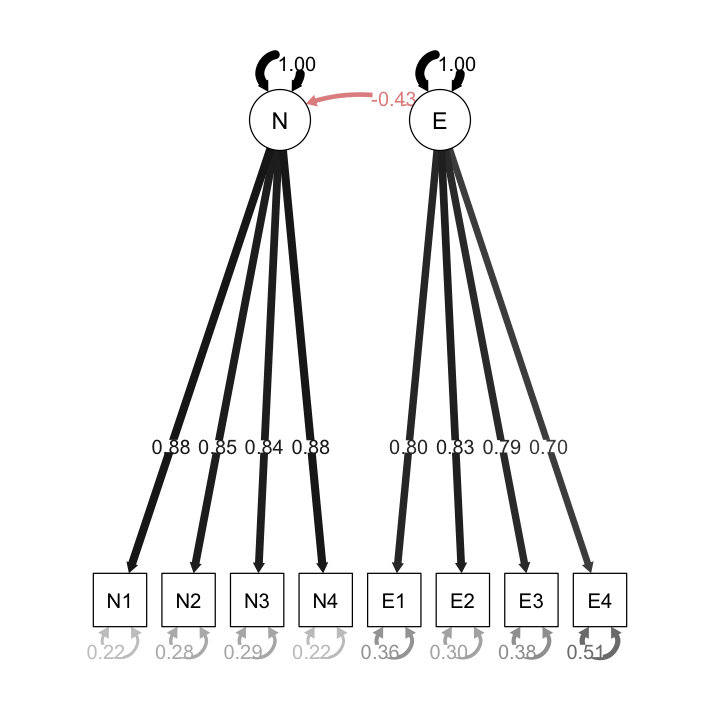

In [14]:
semPaths(
  fit2_cfa,
  "std", 
  posCol = c("black"),
  edge.label.cex = 1, 
  sizeMan = 7,
  edge.label.position = 0.7 # Adjust this value to control label position
);

Esaminiamo le saturazioni fattoriali:

In [15]:
parameterEstimates(fit2_cfa, standardized = TRUE) %>%
  dplyr::filter(op == "=~") %>%
  dplyr::select(
    "Latent Factor" = lhs, 
    Indicator = rhs, 
    B = est, 
    SE = se, 
    Z = z, 
    "p-value" = pvalue, 
    Beta = std.all) %>%
  knitr::kable(digits = 3, booktabs = TRUE, format = "markdown", 
               caption = "Factor Loadings")



Table: Factor Loadings

|Latent Factor |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-------------|:---------|-----:|-----:|------:|-------:|-----:|
|N             |N1        | 0.883| 0.051| 17.472|       0| 0.885|
|N             |N2        | 0.847| 0.052| 16.337|       0| 0.849|
|N             |N3        | 0.842| 0.052| 16.190|       0| 0.844|
|N             |N4        | 0.880| 0.051| 17.381|       0| 0.882|
|E             |E1        | 0.800| 0.055| 14.465|       0| 0.802|
|E             |E2        | 0.832| 0.054| 15.294|       0| 0.834|
|E             |E3        | 0.788| 0.056| 14.150|       0| 0.789|
|E             |E4        | 0.698| 0.058| 11.974|       0| 0.699|

Le saturazioni sono simili a quelle che abbiamo trovato in precedenza, In questo caso, però, la matrice delle correlazioni residue è adeguata:

In [16]:
cor_table <- residuals(fit2_cfa, type = "cor")$cov
knitr::kable(
  cor_table, 
  digits = 3, 
  format = "markdown", 
  booktabs = TRUE
)



|   |     N1|     N2|     N3|     N4|     E1|     E2|     E3|     E4|
|:--|------:|------:|------:|------:|------:|------:|------:|------:|
|N1 |  0.000|  0.016| -0.015| -0.002| -0.042|  0.005|  0.008| -0.013|
|N2 |  0.016|  0.000| -0.007| -0.010| -0.006|  0.028|  0.002|  0.004|
|N3 | -0.015| -0.007|  0.000|  0.018| -0.062|  0.006| -0.007| -0.035|
|N4 | -0.002| -0.010|  0.018|  0.000| -0.010|  0.053|  0.007|  0.023|
|E1 | -0.042| -0.006| -0.062| -0.010|  0.000|  0.006|  0.001| -0.027|
|E2 |  0.005|  0.028|  0.006|  0.053|  0.006|  0.000| -0.007|  0.010|
|E3 |  0.008|  0.002| -0.007|  0.007|  0.001| -0.007|  0.000|  0.014|
|E4 | -0.013|  0.004| -0.035|  0.023| -0.027|  0.010|  0.014|  0.000|

**Esempio.** Esaminiamo più da vicino la matrice di correlazioni riprodotta dal modello, nel caso di fattori obliqui. Le saturazioni fattoriali sono:

In [17]:
lambda <- inspect(fit2_cfa, what="std")$lambda
lambda

,N,E
N1,0.8848214,0.0000000
N2,0.8485128,0.0000000
N3,0.8436432,0.0000000
N4,0.8819736,0.0000000
E1,0.0000000,0.8018485
E2,0.0000000,0.8337599
E3,0.0000000,0.7894530
E4,0.0000000,0.6990366


La matrice di intercorrelazoni fattoriali è

In [18]:
Phi <- inspect(fit2_cfa, what="std")$psi
Phi

,N,E
N,1.000000,-0.434962
E,-0.434962,1.000000


Le varianze residue sono:

In [19]:
Psi <- inspect(fit2_cfa, what="std")$theta
Psi

,N1,N2,N3,N4,E1,E2,E3,E4
N1,0.217091,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000
N2,0.000000,0.2800261,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000
N3,0.000000,0.0000000,0.2882661,0.0000000,0.000000,0.0000000,0.000000,0.0000000
N4,0.000000,0.0000000,0.0000000,0.2221225,0.000000,0.0000000,0.000000,0.0000000
E1,0.000000,0.0000000,0.0000000,0.0000000,0.357039,0.0000000,0.000000,0.0000000
E2,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.3048445,0.000000,0.0000000
E3,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.376764,0.0000000
E4,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.5113478


Mediante i parametri del modello  la matrice di correlazione si riproduce nel modo seguente:

$$
\boldsymbol{\Sigma} =\boldsymbol{\Lambda} \boldsymbol{\Phi} \boldsymbol{\Lambda}^{\mathsf{T}} + \boldsymbol{\Psi}. 
$$

In $\textsf{R}$ scriviamo:

In [20]:
R_hat <- lambda %*% Phi %*% t(lambda) + Psi
R_hat %>% 
  round(3)

,N1,N2,N3,N4,E1,E2,E3,E4
N1,1.000,0.751,0.746,0.780,-0.309,-0.321,-0.304,-0.269
N2,0.751,1.000,0.716,0.748,-0.296,-0.308,-0.291,-0.258
N3,0.746,0.716,1.000,0.744,-0.294,-0.306,-0.290,-0.257
N4,0.780,0.748,0.744,1.000,-0.308,-0.320,-0.303,-0.268
E1,-0.309,-0.296,-0.294,-0.308,1.000,0.669,0.633,0.561
E2,-0.321,-0.308,-0.306,-0.320,0.669,1.000,0.658,0.583
E3,-0.304,-0.291,-0.290,-0.303,0.633,0.658,1.000,0.552
E4,-0.269,-0.258,-0.257,-0.268,0.561,0.583,0.552,1.000


Le correlazioni residue sono:

In [21]:
(psychot_cor_mat - R_hat) %>% 
  round(3)

,N1,N2,N3,N4,E1,E2,E3,E4
N1,0.000,0.016,-0.015,-0.002,-0.042,0.005,0.008,-0.013
N2,0.016,0.000,-0.007,-0.010,-0.006,0.028,0.002,0.004
N3,-0.015,-0.007,0.000,0.018,-0.062,0.006,-0.007,-0.035
N4,-0.002,-0.010,0.018,0.000,-0.010,0.053,0.007,0.023
E1,-0.042,-0.006,-0.062,-0.010,0.000,0.006,0.001,-0.027
E2,0.005,0.028,0.006,0.053,0.006,0.000,-0.007,0.010
E3,0.008,0.002,-0.007,0.007,0.001,-0.007,0.000,0.014
E4,-0.013,0.004,-0.035,0.023,-0.027,0.010,0.014,0.000


Questo risultato riproduce ciò che abbiamo trovato estraendo la matrice di correlazioni residue dall'oggetto creato dal `lavaan::cfa` mediante l'istruzione `residuals(fit2_cfa, type = "cor")$cov`.

Per fare un esempio relativo alla correlazione tra due indicatori, calcoliamo la correlazione predetta dal modello tra le variabili $Y_1$ e $Y_2$:

In [22]:
lambda[1, 1] * lambda[2, 1] + lambda[1, 2] * lambda[2, 2] +
  lambda[1, 1] * lambda[2, 2] * Phi[1, 2] + 
  lambda[1, 2] * lambda[2, 1] * Phi[1, 2]

[1] 0.7507823

Questo valore si avvicina al valore contenuto dell'elemento (1, 2) della
matrice di correlazioni osservate:

In [23]:
psychot_cor_mat[1, 2]

[1] 0.767

Usando le funzonalità di `lavaan` la matrice di correlazione predetta si ottiene con:

In [24]:
fitted(fit2_cfa)$cov |>
    print()

       N1     N2     N3     N4     E1     E2     E3     E4
N1  0.996                                                 
N2  0.748  0.996                                          
N3  0.743  0.713  0.996                                   
N4  0.777  0.745  0.741  0.996                            
E1 -0.307 -0.295 -0.293 -0.306  0.996                     
E2 -0.320 -0.306 -0.305 -0.319  0.666  0.996              
E3 -0.303 -0.290 -0.289 -0.302  0.630  0.656  0.996       
E4 -0.268 -0.257 -0.255 -0.267  0.558  0.580  0.550  0.996


La matrice dei residui è

In [25]:
resid(fit2_cfa)$cov |>
    print()

       N1     N2     N3     N4     E1     E2     E3     E4
N1  0.000                                                 
N2  0.016  0.000                                          
N3 -0.015 -0.007  0.000                                   
N4 -0.002 -0.010  0.018  0.000                            
E1 -0.042 -0.006 -0.062 -0.010  0.000                     
E2  0.005  0.028  0.006  0.053  0.006  0.000              
E3  0.008  0.002 -0.007  0.007  0.001 -0.007  0.000       
E4 -0.013  0.004 -0.035  0.023 -0.026  0.010  0.014  0.000


La matrice dei residui standardizzati è

In [26]:
resid(fit2_cfa, type = "standardized")$cov |>
    print()

       N1     N2     N3     N4     E1     E2     E3     E4
N1  0.000                                                 
N2  1.674  0.000                                          
N3 -1.769 -0.569  0.000                                   
N4 -0.350 -1.152  1.746  0.000                            
E1 -1.214 -0.161 -1.646 -0.294  0.000                     
E2  0.154  0.794  0.168  1.626  0.637  0.000              
E3  0.219  0.062 -0.191  0.193  0.075 -0.693  0.000       
E4 -0.314  0.092 -0.824  0.552 -1.481  0.624  0.690  0.000


I valori precedenti possono essere considerati come punti *z*, dove i valori con un valore assoluto maggiore di 2 possono essere ritenuti problematici. Tuttavia, è importante considerare che in questo modo si stanno eseguendo molteplici confronti, pertanto, si dovrebbe considerare l'opportunità di applicare una qualche forma di correzione per i confronti multipli.
:::

## EFA con `lavaan`

Una funzionalità sperimentale di `lavaan` (ancora non ufficiale) è quella che consente di svolgere l'analisi fattoriale esplorativa con la funzione `efa()`. Consideriamo nuovamente i dati di @brown2015confirmatory, ovvero otto misure di personalità raccolte su un campione di 250 pazienti che hanno concluso un programma di psicoterapia.

Definiamo un modello ad un solo fattore comune.

In [27]:
# 1-factor model
f1 <- '
efa("efa")*f1 =~ N1 + N2 + N3 + N4 + E1 + E2 + E3 + E4
'

Definiamo un modello con due fattori comuni.

In [28]:
# 2-factor model
f2 <- '
efa("efa")*f1 +
efa("efa")*f2 =~ N1 + N2 + N3 + N4 + E1 + E2 + E3 + E4
'

Adattiamo ai dati il modello ad un fattore comune.

In [29]:
efa_f1 <-
  cfa(
    model = f1,
    sample.cov = psychot_cor_mat,
    sample.nobs = 250,
    rotation = "oblimin"
  )

Esaminiamo la soluzione ottenuta.

In [30]:
summary(
  efa_f1,
  fit.measures = TRUE,
  standardized = TRUE,
  rsquare = TRUE
) |>
  print()

lavaan 0.6.15 ended normally after 2 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        16

  Rotation method                      OBLIMIN OBLIQUE
  Oblimin gamma                                      0
  Rotation algorithm (rstarts)                GPA (30)
  Standardized metric                             TRUE
  Row weights                                     None

  Number of observations                           250

Model Test User Model:
                                                      
  Test statistic                               375.327
  Degrees of freedom                                20
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              1253.791
  Degrees of freedom                                28
  P-value                                        0.000

User Model vers

Adattiamo ai dati il modello a due fattori comuni.

In [31]:
efa_f2 <-
  cfa(
    model = f2,
    sample.cov = psychot_cor_mat,
    sample.nobs = 250,
    rotation = "oblimin"
  )

Esaminiamo la soluzione ottenuta.

In [32]:
summary(
  efa_f2,
  fit.measures = TRUE,
  standardized = TRUE,
  rsquare = TRUE
) |>
  print()

lavaan 0.6.15 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        23

  Rotation method                      OBLIMIN OBLIQUE
  Oblimin gamma                                      0
  Rotation algorithm (rstarts)                GPA (30)
  Standardized metric                             TRUE
  Row weights                                     None

  Number of observations                           250

Model Test User Model:
                                                      
  Test statistic                                 9.811
  Degrees of freedom                                13
  P-value (Chi-square)                           0.709

Model Test Baseline Model:

  Test statistic                              1253.791
  Degrees of freedom                                28
  P-value                                        0.000

User Model versu

Anche se abbiamo introdotto finora soltanto la misura di bontà di adattamento del chi-quadrato, aggiungiamo qui il calcolo di altre misure di bontà di adattamento che discuteremo in seguito.

In [33]:
# define the fit measures
fit_measures_robust <- c(
  "chisq", "df", "pvalue", 
  "cfi", "rmsea", "srmr"
)

Confrontiamo le misure di bontà di adattamento del modello che ipotizza un solo fattore comune e il modello che ipotizza la presenza di due fattori comuni.

In [34]:
# collect them for each model
rbind(
  fitmeasures(efa_f1, fit_measures_robust),
  fitmeasures(efa_f2, fit_measures_robust)
) %>%
  # wrangle
  data.frame() %>%
  mutate(
    chisq = round(chisq, digits = 0),
    df = as.integer(df),
    pvalue = ifelse(pvalue == 0, "< .001", pvalue)
  ) %>%
  mutate_at(vars(cfi:srmr), ~ round(., digits = 3))

chisq,df,pvalue,cfi,rmsea,srmr
<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>
375,20,< .001,0.71,0.267,0.187
10,13,0.709310449320098,1.00,0.000,0.010


L'evidenza empirica supporta la superiorità del modello a due fattori rispetto a quello ad un solo fattore comune. In particolare, l'analisi fattoriale esplorativa svolta mediante la funzione `efa()` evidenzia la capacità del modello a due fattori di fornire una descrizione adeguata della struttura dei dati e di distinguere in modo sensato tra i due fattori ipotizzati.

**Esercizio.** Si utilizzino i dati `dass21.txt` che corrispondono alla somministrazione del test DASS-21 a 334 partecipanti. Lo schema di codifica si può trovare seguendo questo [link](https://maic.qld.gov.au/wp-content/uploads/2016/07/DASS-21.pdf). Si adatti ai dati un modello a tre fattori usando l'analisi fattoriale esplorativa con la funzione `lavaan::efa()`. Usando le saturazioni fattoriali e la matrice di inter-correlazioni fattoriali, si trovi la matrice di correlazioni riprodotta dal modello. Senza usare l'albebra matriciale, si trovi la correlazione predetta tra gli indicatori DASS-1 e DASS-2.

